In [5]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("summer")
sns.set(rc={'figure.figsize':(11.7,8.27)})
from statsmodels.tsa.stattools import adfuller

In [6]:
log = pd.read_csv("pomodone-log.csv", index_col="started_date", parse_dates=["started_date"])
log.drop(inplace=True, columns=["description", "permalink", "log note", "interruption notes", "item id", "manually added/edited", "subtask", "time spent decimal"])
log["time spent"] = pd.to_timedelta(log["time spent"])
log['mins'] = log["time spent"].dt.seconds / 60
print(log.columns)
log.dtypes

Index(['project', 'task', 'time spent', 'mins'], dtype='object')


project                object
task                   object
time spent    timedelta64[ns]
mins                  float64
dtype: object

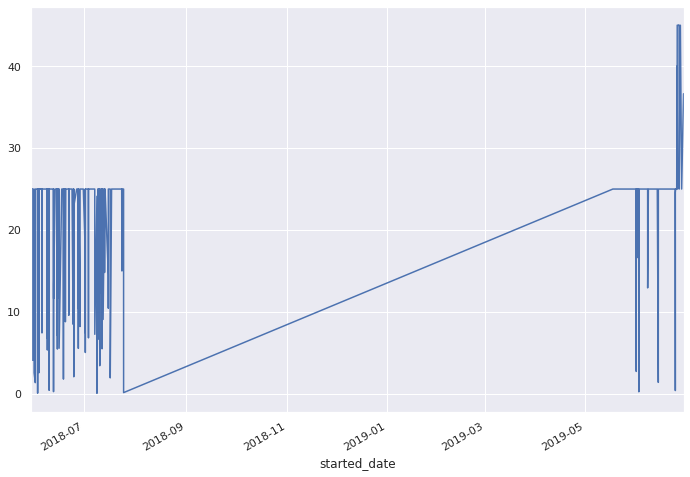

In [7]:
(log["time spent"].dt.seconds / 60).plot()

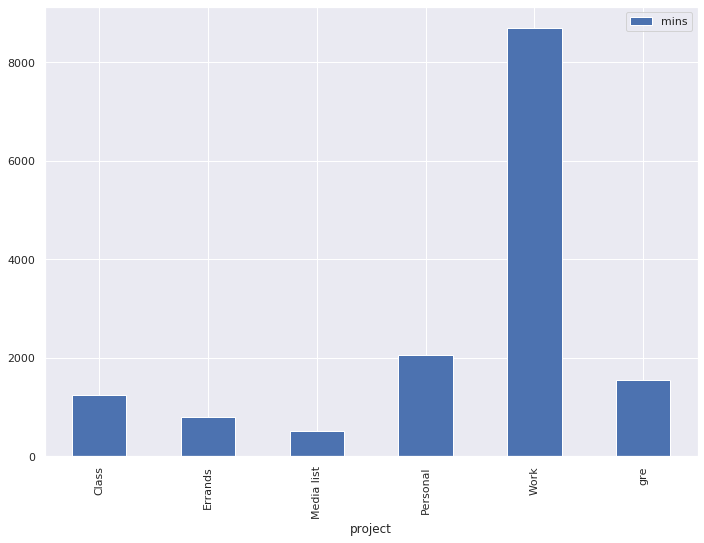

In [8]:
log.groupby("project").sum()[["mins"]].plot.bar()

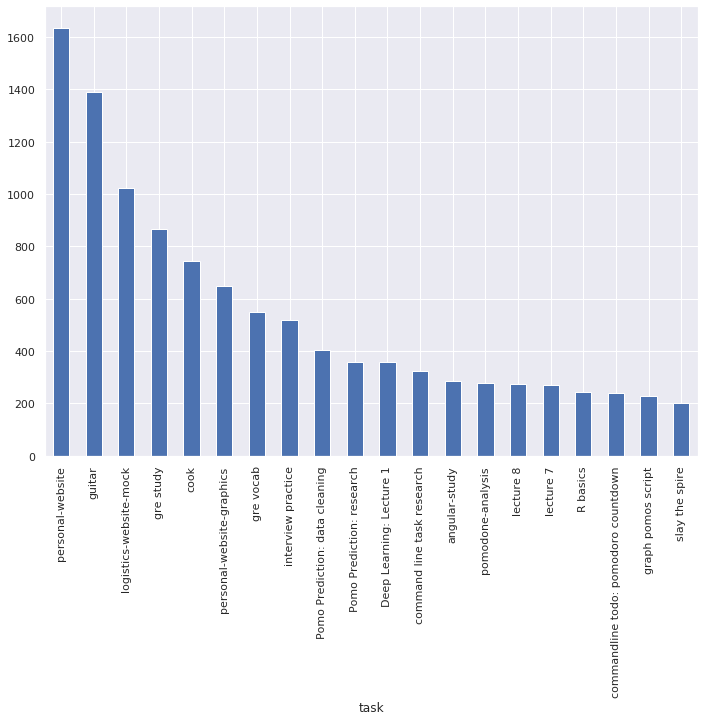

In [9]:
(log.groupby("task").sum()["mins"].nlargest(20)).plot.bar()

In [10]:
log[log.task == "personal-website"].sum()

project       WorkWorkWorkWorkWorkWorkWorkWorkWorkWorkWorkWo...
task          personal-websitepersonal-websitepersonal-websi...
time spent                                      1 days 03:15:58
mins                                                    1635.97
dtype: object

In [11]:
log.resample('D').sum()[["mins"]]["2019-05-01":].mean()

mins    105.809167
dtype: float64

In [12]:
day_log = log.resample("D", how="sum")

/home/sriram/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [13]:
adfuller(day_log.mins)

(-2.618301599638887,
 0.08927338532190754,
 16,
 380,
 {'1%': -3.4476763783532585,
  '5%': -2.869176103659426,
  '10%': -2.570837873961219},
 4070.2507356138067)